This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

19 house features plus the price and the id columns, along with 21613 observations.

Column Info –

id - a notation for a house
date -Date house was sold
price- Price is prediction target
bedrooms- Number of Bedrooms/House
bathrooms- Number of bathrooms/bedrooms
sqft_living- square footage of the home
sqft_lot- square footage of the lot
floors-Total floors (levels) in house
waterfront- House which has a view to a waterfront
view-Has been viewed
condition-How good the condition is ( Overall )
grade-overall grade given to the housing unit, based on King County grading system
sqft_above-square footage of house apart from basement
sqft_basement-square footage of the basement
yr_built-Built Year
yr_renovated-Year when house was renovated
zipcode-zip
lat-Latitude coordinate
long-Longitude coordinate
sqft_living15-Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area-sqft_lot15
lotSize area in 2015(implies-- some renovations)

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
#Load the data set and check the shape
import pandas as pd
import numpy as np
df = pd.read_csv('kc_house_data.csv')
print(df.shape)

(21613, 21)


In [43]:
# Printing the first 5 columns
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
#drop the id column
del df['id']

In [45]:
# Check for missing values. No missing values found.
NA_Count = pd.DataFrame({'Sum of NA':df.isnull().sum()}).sort_values(by=['Sum of NA'],ascending=[0])
NA_Count

,Sum of NA
date,0
price,0
sqft_living15,0
long,0
lat,0
zipcode,0
yr_renovated,0
yr_built,0
sqft_basement,0
sqft_above,0


As the date data is hard to be fitted in the model, 
we decided to transfer them into the numeric values. 
We will take the minimum date in the whole data set as the benchmark 
and calculate the date between the actual date and it.

In [46]:
df['date'] = df['date'].str.split('T').str[0]

In [47]:
df.date = df.date.astype('int64')

In [48]:
min_date = min(df['date'])
def get_interval(date):
    return (date-min_date)

In [49]:
df['date'] = df['date'].apply(lambda x: get_interval(x))

In [50]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,511,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,707,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,9723,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,707,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,9716,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Exploratory data analysis

# Looking at the data set we can identify two kind of variables, continous and categorical. 
categorical variables are waterfront,view,condition,grade]
continous variables are bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15

In [51]:
#Check the data types of all the columns.Except for status which is the column to be predicted rest all are float.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


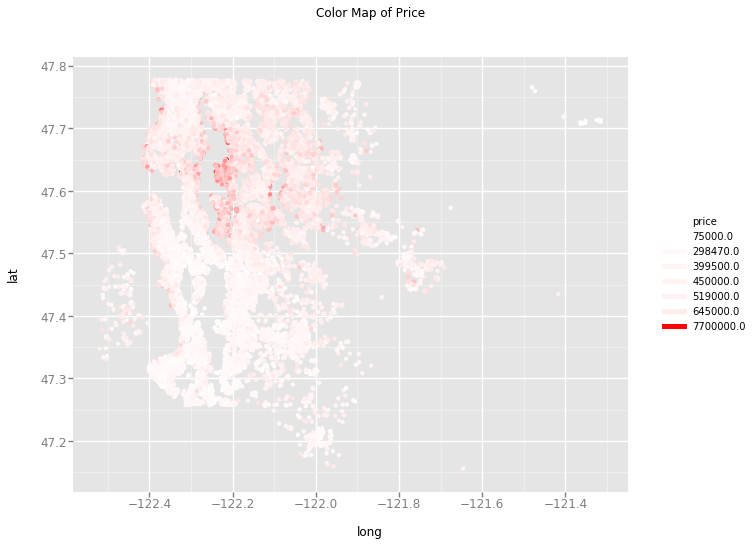

<ggplot: (-9223371947108808532)>


In [52]:
#Longitute/Latitude vs Price
from ggplot import *
from pandas import Timestamp
lonlat = ggplot(df,aes(x='long',y='lat',color='price'))+geom_point()+scale_color_gradient(low='white',high='red')+ggtitle('Color Map of Price') 
print(lonlat)

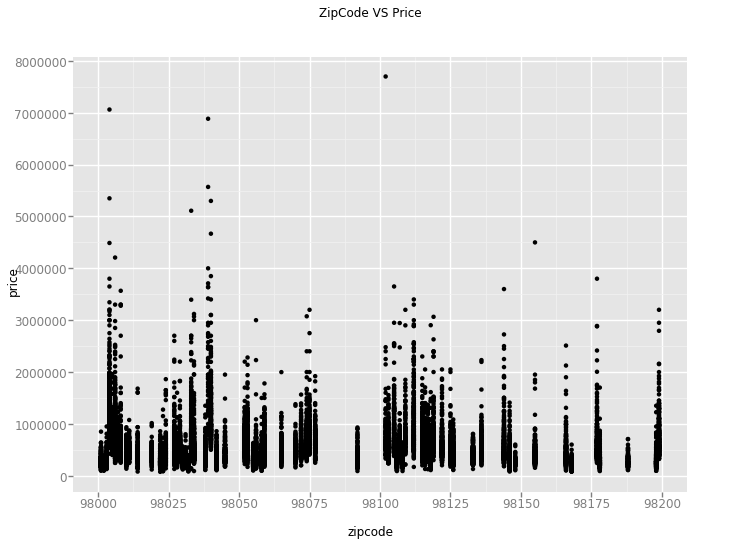

<ggplot: (-9223371947108850330)>


In [53]:
#Zip code Vs Price
zipprice = ggplot(df,aes(x='zipcode',y='price'))+geom_point()+ggtitle('ZipCode VS Price')
print(zipprice)

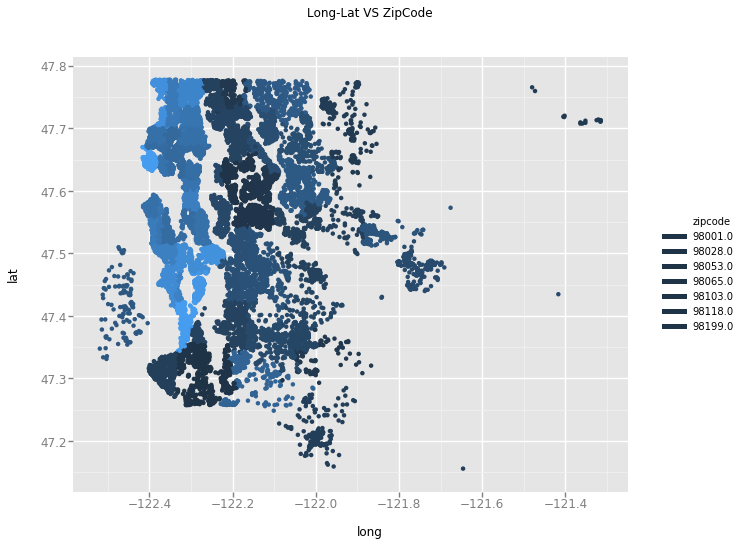

<ggplot: (-9223371947114094213)>


In [54]:
latlonzip = ggplot(df,aes(x='long',y='lat',color='zipcode'))+geom_point()+ggtitle('Long-Lat VS ZipCode')
print(latlonzip)

In [55]:
#Correlation analysis using heat map
corr = df.corr()
corr.style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1,0.00303274,-0.010493,-0.0275235,-0.0297913,0.00559864,-0.0225495,-0.00379817,0.00106334,-0.046517,-0.0314638,-0.0244208,-0.0161303,0.00324828,-0.0240704,0.00123528,-0.0297698,-0.000301102,-0.0227524,0.000153894
price,0.00303274,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,-0.010493,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,-0.0275235,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0297913,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,0.00559864,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,-0.0225495,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,-0.00379817,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.00106334,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.046517,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552


From the correlation plot we can see the 5 features with the strongest effect on the price. The list of the most correlated variables
sqft_living(0.7)
grade(0.67)
sqft_above(0.61)
sqft_living15(0.59)
bathrooms(0.53)

Variables waterfront, sqft_lot, yr_renovated or sqft_lot15 have low correlation with most of the other variables. We can drop these variables for further processing.

In [56]:
del df['sqft_lot']

In [57]:
del df['waterfront']

In [58]:
del df['sqft_lot15']

In [59]:
del df['yr_renovated']

Linear Regression Model

In [60]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [61]:
Models = []
RMSE = []
SCORE = []

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X =  df.drop("price", axis=1)
y =  df.pop("price")
X_std = StandardScaler().fit_transform(X)
train_set, test_set, train_labels, test_labels = train_test_split(X_std, y, test_size=0.30, random_state=2)

Normal Linear Regression

In [64]:
model = LinearRegression(n_jobs=-1)
model.fit(train_set,train_labels)
pred = model.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
score = model.score(test_set,test_labels)
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
SCORE.append(score)
RMSE.append(Accuracy)
Models.append('LinReg')

========================================RMSE: 209301.4416937393========================================


Linear Regression With Polynomial Transformation

In [65]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
('sc',StandardScaler()),
('poly',PolynomialFeatures(include_bias=True)),
('reg',LinearRegression())
])
model = GridSearchCV(pipe,param_grid={'poly__degree':[2,3]})
model.fit(train_set,train_labels)
degree = model.best_params_
print(degree)
pred = model.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('PolyLinReg')
score = model.score(test_set,test_labels)
SCORE.append(score)

{'poly__degree': 2}
========================================RMSE: 170432.2434717006========================================


Regular LASSO model 

In [66]:
from sklearn.linear_model import Lasso

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_set,train_labels)
pred1 = lasso.predict(test_set)
Accuracy = sqrt(mse(pred1,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('Lasso')
score = lasso.score(test_set,test_labels)
SCORE.append(score)

========================================RMSE: 209301.43775287367========================================


In [69]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
pipe = Pipeline([
('sc',StandardScaler()),
('poly',PolynomialFeatures(degree=2,include_bias=True)),
('las',Lasso())
])
model = GridSearchCV(pipe,param_grid={'las__alpha':[0.0005,0.001,0.01]})
model.fit(train_set,train_labels)
degree = model.best_params_
print(degree)
pred = model.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('PolyLasso')
score = model.score(test_set,test_labels)
SCORE.append(score)

{'las__alpha': 0.01}
========================================RMSE: 170434.68828582982========================================


Regular Ridge Model

In [71]:
from sklearn.linear_model import Ridge

In [72]:
ridge = Ridge(alpha=.3)
ridge.fit(train_set,train_labels)
pred = ridge.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('Ridge')
score = ridge.score(test_set,test_labels)
SCORE.append(score)

========================================RMSE: 209301.6081588883========================================


Polynomial Ridge

In [73]:
pipe = Pipeline([
('sc',StandardScaler()),
('poly',PolynomialFeatures(degree=2,include_bias=True)),
('rid',Ridge())
])
model = GridSearchCV(pipe,param_grid={'rid__alpha':[0.0005,0.001,0.01]})
model.fit(train_set,train_labels)
degree = model.best_params_
print(degree)
pred = model.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('PolyRidge')
score = model.score(test_set,test_labels)
SCORE.append(score)

{'rid__alpha': 0.01}
========================================RMSE: 170434.68452418357========================================


Normal Ploynomial Transformation

In [74]:
from sklearn.linear_model import ElasticNet

In [75]:
elasticNet = ElasticNet(alpha=.3)
elasticNet.fit(train_set,train_labels)
pred = elasticNet.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('elasticNet')
score = elasticNet.score(test_set,test_labels)
SCORE.append(score)

========================================RMSE: 212161.608186463========================================


In [76]:
import warnings
warnings.filterwarnings("ignore")

ElasticNet Regression with Polynomial transformation

In [77]:
pipe = Pipeline([
('sc',StandardScaler()),
('poly',PolynomialFeatures(degree=2,include_bias=True)),
('en',ElasticNet())
])
model = GridSearchCV(pipe,param_grid={'en__alpha':[0.005,0.01,0.05,0.1],'en__l1_ratio':[0.1,0.4,0.8]})
model.fit(train_set,train_labels)
degree = model.best_params_
print(degree)
pred = model.predict(test_set)
Accuracy = sqrt(mse(pred,test_labels))
print('=='*20+'RMSE: '+str(Accuracy)+'=='*20)
RMSE.append(Accuracy)
Models.append('PolyElasticNet')
score = model.score(test_set,test_labels)
SCORE.append(score)

{'en__alpha': 0.1, 'en__l1_ratio': 0.8}
========================================RMSE: 170632.10331334846========================================


Summary of all the models

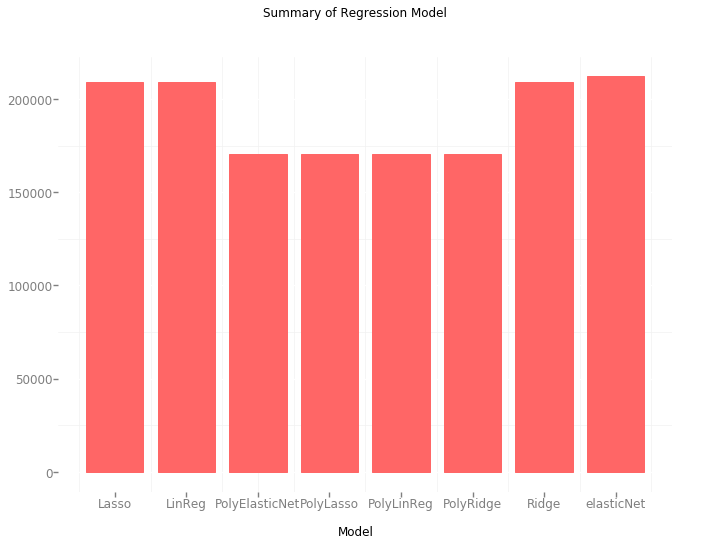

<ggplot: (-9223371947108822377)>


In [78]:
RegSummary = pd.DataFrame({'Model':Models,'RMSE':RMSE})
summary = ggplot(RegSummary,aes(x='Model',weight='RMSE'))+geom_bar(stat="identity", fill = "#FF6666")+theme_bw()+ggtitle('Summary of Regression Model')
print(summary)

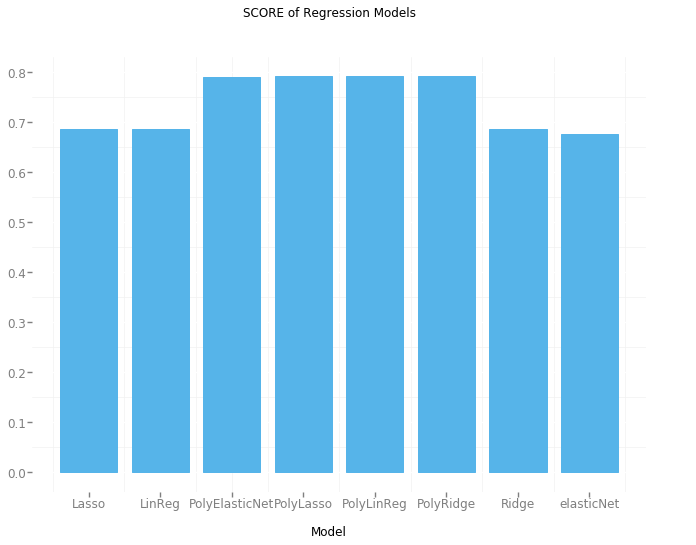

<ggplot: (-9223371947110831549)>


In [79]:
RegSummary = pd.DataFrame({'Model':Models,'SCORE':SCORE})
summary = ggplot(RegSummary,aes(x='Model',weight='SCORE'))+geom_bar(stat="identity", fill = "#56B4E9")+theme_bw()+ggtitle('SCORE of Regression Models')
print(summary)

RMSE Values of all the models:

1. Normal Regression:209301.4416937393
   Polynomial regression:170432.2434717006

2. Normal Rigde:209301.6081588883
   Polynomial Ridge:170434.68452418357

3. Normal Lasso:209301.43775287367
   Polynomial Lasso:170434.68828582982

4. Normal Elasticnet: 212161.608186463
   Polynomial Elasticnet: 170632.10331334846
    
Since Polynomial regression is having the least RMSE it is the best regression model 
amongst the evaluated.